In [86]:
import pandas as pd
import numpy as np

import pymorphy2
import nltk

from matplotlib import pyplot as plt

## Загрузка данных 

In [24]:
abbr = pd.read_csv("../data/abbr_dict.csv", sep="\t")
abbr

,abbr,desc,tags
0,ТММ,теория механизмов и машин,образование и наука
1,ННИЦ алмазов,Национальный научно-исследовательский центр ал...,"г. Якутск, образование и наука"
2,БВВУ,Бакинское высшее военное училище,"воен., г. Баку, образование и наука"
3,ВНИПИЭТ,Всероссийский научно-исследовательский и проек...,NaN
4,СТЭФ,служба технической эксплуатации флота,техн.
...,...,...,...
85530,КПЦ,Коммунистическая партия Цейлона,Коммунистическая партия Цейлона
85531,ФМП,факультет мировой политики,"<a href=""http://www.worldpolitics.redline.ru/""..."
85532,НИИАТ,Государственный научно-исследовательский инсти...,Государственный научно-исследовательский инсти...
85533,КЗП-,комплекс защиты пласта,


In [10]:
lenta = pd.read_csv("../data/lenta-ru-news.csv")
lenta

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


### Приведение к нормальной форме 

In [ ]:
morph = pymorphy2.MorphAnalyzer(lang="ru")

def get_normal_form(line):
    return morph.parse(str(line))[0].normal_form

abbr["desc_normal_form"] = abbr["desc"].apply(get_normal_form)
lenta["text_normal_form"] = lenta["text"].apply(get_normal_form)

### Токенизация 

In [106]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
def tokenize(line):
    return tokenizer.tokenize(str(line).lower())

abbr["desc_tokenized"] = abbr["desc_normal_form"].apply(tokenize).ast
lenta["text_tokenized"] = lenta["text_normal_form"].apply(tokenize)

In [109]:
abbr["abbr_tokenized"] = abbr["abbr"].apply(tokenize)
abbr["abbr_normal_form"] = abbr["abbr_tokenized"].apply(lambda x: " ".join(x))

### Ограничение по размеру текста 

(0.0, 1000.0)

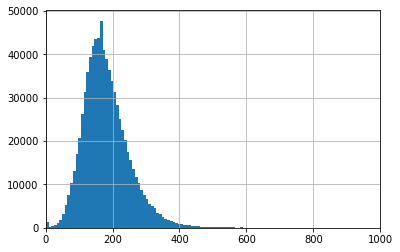

In [89]:
lenta.text_tokenized.apply(len).hist(bins=1000)

plt.xlim(0, 1000)

In [112]:
MIN_WORD_IN_SENTENCE = 32
MAX_WORD_IN_SENTENCE = 512

lenta = lenta[
    (MIN_WORD_IN_SENTENCE <= lenta["text_tokenized"].apply(len)) & 
    (lenta["text_tokenized"].apply(len) <= MAX_WORD_IN_SENTENCE)
]

### Фильтрация аббревиатур 

<AxesSubplot:>

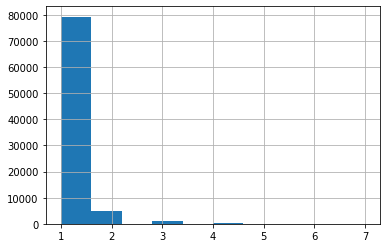

In [121]:
abbr["abbr_tokenized"].apply(len).hist(bins=10)

In [123]:
MAX_ABBR_WORD = 1

abbr = abbr[abbr["abbr_tokenized"].apply(len) == MAX_ABBR_WORD]

In [127]:
lenta

,text,text_normal_form,text_tokenized
0,Бои у Сопоцкина и Друскеник закончились отступ...,бои у сопоцкина и друскеник закончились отступ...,"[бои, у, сопоцкина, и, друскеник, закончились,..."
1,"Министерство народного просвещения, в виду про...","министерство народного просвещения, в виду про...","[министерство, народного, просвещения, в, виду..."
2,"Штабс-капитан П. Н. Нестеров на днях, увидев в...","штабс-капитан п. н. нестеров на днях, увидев в...","[штабс, капитан, п, н, нестеров, на, днях, уви..."
3,Фотограф-корреспондент Daily Mirror рассказыва...,фотограф-корреспондент daily mirror рассказыва...,"[фотограф, корреспондент, daily, mirror, расск..."
4,"Лица, приехавшие в Варшаву из Люблина, передаю...","лица, приехавшие в варшаву из люблина, передаю...","[лица, приехавшие, в, варшаву, из, люблина, пе..."
...,...,...,...
800970,Певец Сергей Шнуров раскритиковал свою коллегу...,певец сергей шнуров раскритиковал свою коллегу...,"[певец, сергей, шнуров, раскритиковал, свою, к..."
800971,Министерство юстиции России предложило изменит...,министерство юстиции россии предложило изменит...,"[министерство, юстиции, россии, предложило, из..."
800972,Испытание США ранее запрещенной Договором о ли...,испытание сша ранее запрещенной договором о ли...,"[испытание, сша, ранее, запрещенной, договором..."
800973,В ближайшие дни в европейской части России пог...,в ближайшие дни в европейской части россии пог...,"[в, ближайшие, дни, в, европейской, части, рос..."


### Сохранение

In [128]:
(
    abbr[["abbr_normal_form", "desc_normal_form", "desc_tokenized"]]
        .to_csv("../data/abbr_dict_upd.csv", index=False, header=True, sep="\t")
)

(
    lenta[["text_normal_form", "text_tokenized"]]
        .to_csv("../data/lenta-ru-news_upd.csv", index=False, header=True)
)

## Создание датасета 

In [129]:
lenta = pd.read_csv("../data/lenta-ru-news_upd.csv")
lenta

,text_normal_form,text_tokenized
0,бои у сопоцкина и друскеник закончились отступ...,"['бои', 'у', 'сопоцкина', 'и', 'друскеник', 'з..."
1,"министерство народного просвещения, в виду про...","['министерство', 'народного', 'просвещения', '..."
2,"штабс-капитан п. н. нестеров на днях, увидев в...","['штабс', 'капитан', 'п', 'н', 'нестеров', 'на..."
3,фотограф-корреспондент daily mirror рассказыва...,"['фотограф', 'корреспондент', 'daily', 'mirror..."
4,"лица, приехавшие в варшаву из люблина, передаю...","['лица', 'приехавшие', 'в', 'варшаву', 'из', '..."
...,...,...
796634,певец сергей шнуров раскритиковал свою коллегу...,"['певец', 'сергей', 'шнуров', 'раскритиковал',..."
796635,министерство юстиции россии предложило изменит...,"['министерство', 'юстиции', 'россии', 'предлож..."
796636,испытание сша ранее запрещенной договором о ли...,"['испытание', 'сша', 'ранее', 'запрещенной', '..."
796637,в ближайшие дни в европейской части россии пог...,"['в', 'ближайшие', 'дни', 'в', 'европейской', ..."


In [130]:
abbr = pd.read_csv("../data/abbr_dict_upd.csv", sep="\t")
abbr

,abbr_normal_form,desc_normal_form,desc_tokenized
0,тмм,теория механизмов и машина,"['теория', 'механизмов', 'и', 'машина']"
1,бвву,бакинское высшее военное училище,"['бакинское', 'высшее', 'военное', 'училище']"
2,внипиэт,всероссийский научно-исследовательский и проек...,"['всероссийский', 'научно', 'исследовательский..."
3,стэф,служба технической эксплуатации флот,"['служба', 'технической', 'эксплуатации', 'флот']"
4,пео,первичная единица отбор,"['первичная', 'единица', 'отбор']"
...,...,...,...
79271,кпц,коммунистическая партия цейлон,"['коммунистическая', 'партия', 'цейлон']"
79272,фмп,факультет мировой политик,"['факультет', 'мировой', 'политик']"
79273,нииат,государственный научно-исследовательский инсти...,"['государственный', 'научно', 'исследовательск..."
79274,кзп,комплекс защиты пласт,"['комплекс', 'защиты', 'пласт']"


In [149]:
abbr.desc_tokenized.apply(lambda x: len(list(x)))

0         39
1         45
2        107
3         49
4         33
        ... 
79271     40
79272     35
79273     93
79274     31
79275      9
Name: desc_tokenized, Length: 79276, dtype: int64

(0.0, 100.0)

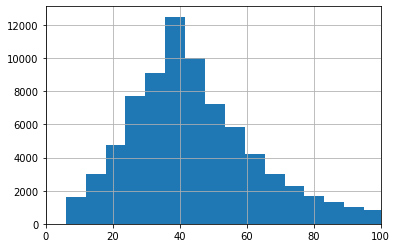

In [144]:
abbr.desc_tokenized.apply(lambda x: len(list(x))).hist(bins=100)

plt.xlim(0, 100)

In [142]:
abbr[abbr.desc_tokenized.apply(len)==40]

,abbr_normal_form,desc_normal_form,desc_tokenized
186,цдм,центральная дуговая магистраль,"['центральная', 'дуговая', 'магистраль']"
225,сантрест,трест по санитарной техника,"['трест', 'по', 'санитарной', 'техника']"
251,опхк,ол партиз хурриет конференс,"['ол', 'партиз', 'хурриет', 'конференс']"
266,рро,регистратор расчётных операция,"['регистратор', 'расчётных', 'операция']"
297,дгс,диалоговая графическая система,"['диалоговая', 'графическая', 'система']"
...,...,...,...
79132,спя,социалистическая партия япония,"['социалистическая', 'партия', 'япония']"
79160,удс,универсальная доильная станция,"['универсальная', 'доильная', 'станция']"
79239,млж,медицина лабораторных животный,"['медицина', 'лабораторных', 'животный']"
79270,акс,агентство конфликтных ситуация,"['агентство', 'конфликтных', 'ситуация']"


## Замена 

In [154]:
lenta.text_tokenized.apply(eval)

KeyboardInterrupt: 